In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

In [19]:
df = pd.read_csv("Datas\silhouette_score_data_dummy.csv").drop(["kmeans SOM"], axis=1)
df

,kmeans++,random SOM,kmeans++ SOM,SOM++,kde SOM
0,0.316306,0.343671,0.530422,0.436382,0.598841
1,0.277304,0.802220,-0.104566,0.282564,0.382795
2,0.227434,0.222184,-0.123460,0.458091,0.436741
3,0.274757,0.348665,0.498754,0.390459,0.391999
4,0.268992,0.345783,0.818857,0.386877,0.412764
5,0.280664,0.430721,-0.108734,0.324022,0.445307
6,0.269157,0.447899,-0.115931,0.146060,0.415130
7,0.478564,0.242092,0.818857,0.084906,0.453683
8,0.295306,0.388706,0.386825,0.818857,0.376250
9,0.264671,0.078858,0.818857,0.140838,0.426740


{'whiskers': [<matplotlib.lines.Line2D at 0x27872b69c70>,
 'caps': [<matplotlib.lines.Line2D at 0x27872b7a1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27872b699d0>,
 'medians': [<matplotlib.lines.Line2D at 0x27872b7a730>,
 'fliers': [<matplotlib.lines.Line2D at 0x27872b7a9d0>,
 'means': []}

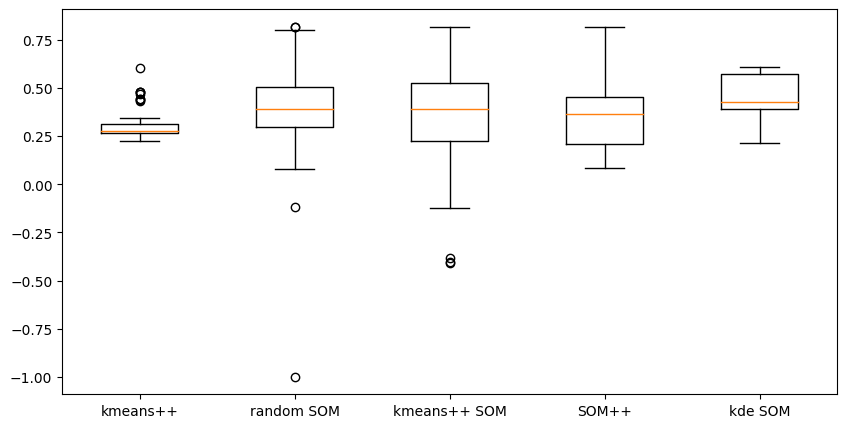

In [20]:
plt.figure(figsize=(10, 5))
plt.boxplot(df, labels=df.columns)

In [24]:
data1 = df["SOM++"]
data2 = df["kde SOM"]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-3.239, p=0.002
Probably different distributions


In [25]:
res = [[ttest_rel(df[i], df[j]) for j in df.columns] for i in df.columns]
stat_matrix = np.array([[j.statistic for j in i] for i in res])
pval_matrix = np.array([[j.pvalue for j in i] for i in res])
pval_matrix_filtered = [[j if j > 0.05 else 0 for j in i] for i in pval_matrix]

In [28]:
cols = df.columns
dif_label = []
for i in range(len(pval_matrix)):
    for j in range(len(pval_matrix[0])):
        val = pval_matrix_filtered[i][j]
        if val > 0 :
            dif_label.append(("'{}' > '{}'".format(cols[i],cols[j]) if np.mean(df[cols[i]].values) > np.mean(df[cols[j]].values) else "'{}' > '{}'".format(cols[j],cols[i])))
        elif cols[i] != cols[j] and (("SOM" in cols[i] and "SOM" in cols[j]) or ("kmeans" in cols[i] and "kmeans" in cols[j]) ):
            dif_label.append("'{}' = '{}'".format(cols[i],cols[j]))
np.unique(dif_label)

array(["'SOM++' = 'kde SOM'", "'SOM++' > 'kmeans++'",
       "'kde SOM' = 'SOM++'", "'kde SOM' > 'kmeans++ SOM'",
       "'kde SOM' > 'random SOM'", "'kmeans++ SOM' > 'SOM++'",
       "'kmeans++ SOM' > 'kmeans++'", "'random SOM' > 'SOM++'",
       "'random SOM' > 'kmeans++ SOM'", "'random SOM' > 'kmeans++'"],
      dtype='<U29')

In [29]:
time_df =  pd.read_csv("Datas/time_execution.csv").drop(["kmeans SOM"], axis=1)
time_df

,kmeans++,random SOM,kmeans++ SOM,SOM++,kde SOM
0,24.916463,37.595258,46.222881,44.614778,38.493233
1,24.536283,37.920853,46.551358,44.961861,37.685503
2,24.618449,38.199708,47.008410,45.889926,37.685503
3,25.328336,39.085025,46.222080,45.921225,37.202197
4,25.148395,39.152891,45.022788,45.916554,38.739152
5,24.289624,36.824900,42.165207,42.944639,35.374647
6,23.742439,36.770647,41.060907,42.122065,35.640577
7,23.092132,36.166343,42.106128,41.335464,35.250606
8,23.512028,35.327895,42.761079,41.379708,35.319267
9,23.827588,36.229150,43.281884,42.459393,34.278707


{'whiskers': [<matplotlib.lines.Line2D at 0x27872eac610>,
 'caps': [<matplotlib.lines.Line2D at 0x27872eacb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x27872eac370>,
 'medians': [<matplotlib.lines.Line2D at 0x27872eacd60>,
 'fliers': [<matplotlib.lines.Line2D at 0x27872ebc040>,
 'means': []}

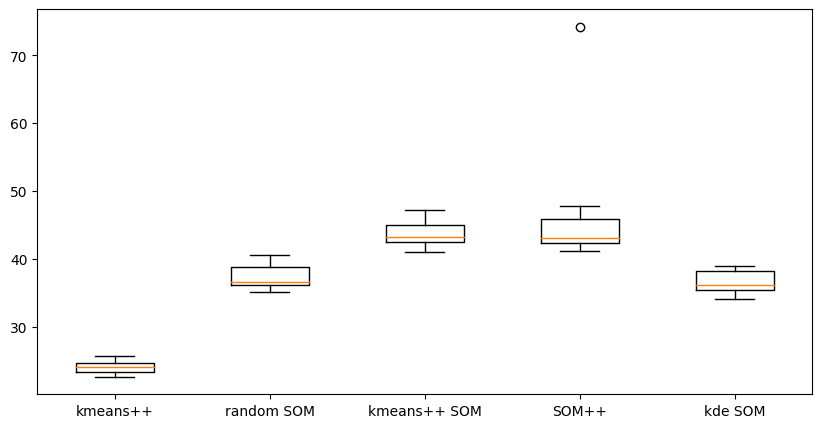

In [31]:
plt.figure(figsize=(10, 5))
plt.boxplot(time_df, labels=time_df.columns)